In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.cluster import KMeans
from datetime import datetime

In [171]:
df = pd.read_csv("CP 1 - Purchase_Fraud_Data.csv")

In [172]:
df

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,ip_address,class,category,dob
0,22058,2/24/2015 22:55,4/18/2015 2:47,65278,QVPSPJUOCKZAR,SEO,Chrome,M,7.327584e+08,0,home_essentials,22-2-1976
1,333320,6/7/2015 20:39,6/8/2015 1:38,96399,EOGFQPIZPYXFZ,Ads,Chrome,F,3.503114e+08,0,apparels,2/1/1962
2,1359,1/1/2015 18:52,1/1/2015 18:52,57296,YSSKYOSJHPPLJ,SEO,Opera,M,2.621474e+09,1,electronics,5/3/1962
3,150084,4/28/2015 21:13,5/4/2015 13:54,43650,ATGTXKYKUDUQN,SEO,Safari,M,3.840542e+09,0,health_care,3/7/1974
4,221365,7/21/2015 7:09,9/9/2015 18:40,45016,NAUITBZFJKHWW,Ads,Safari,M,4.155831e+08,0,home_essentials,25-8-1970
...,...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,1/27/2015 3:03,3/29/2015 0:30,58549,XPSKTWGPWINLR,SEO,Chrome,M,3.451155e+09,1,apparels,7/8/1987
151108,274471,5/15/2015 17:43,5/26/2015 12:24,57952,LYSFABUCPCGBA,SEO,Safari,M,2.439047e+09,0,electronics,9/10/1983
151109,368416,3/3/2015 23:07,5/20/2015 7:07,19003,MEQHCSJUBRBFE,SEO,IE,F,2.748471e+09,0,health_care,17-9-1989
151110,207709,7/9/2015 20:06,9/7/2015 9:34,68296,CMCXFGRHYSTVJ,SEO,Chrome,M,3.601175e+09,0,electronics,1/2/1978


We had seen in original datset that we have data in the 'dob' column so we will convert the dob column to string and optimize the column

In [173]:
df.dtypes

user_id             int64
signup_time        object
purchase_time      object
purchase_value      int64
device_id          object
source             object
browser            object
sex                object
ip_address        float64
class               int64
category           object
dob                object
dtype: object

In [174]:
df['dob'] = df['dob'].map(str)
df['dob'] = df['dob'].str.replace('/','-')

df

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,ip_address,class,category,dob
0,22058,2/24/2015 22:55,4/18/2015 2:47,65278,QVPSPJUOCKZAR,SEO,Chrome,M,7.327584e+08,0,home_essentials,22-2-1976
1,333320,6/7/2015 20:39,6/8/2015 1:38,96399,EOGFQPIZPYXFZ,Ads,Chrome,F,3.503114e+08,0,apparels,2-1-1962
2,1359,1/1/2015 18:52,1/1/2015 18:52,57296,YSSKYOSJHPPLJ,SEO,Opera,M,2.621474e+09,1,electronics,5-3-1962
3,150084,4/28/2015 21:13,5/4/2015 13:54,43650,ATGTXKYKUDUQN,SEO,Safari,M,3.840542e+09,0,health_care,3-7-1974
4,221365,7/21/2015 7:09,9/9/2015 18:40,45016,NAUITBZFJKHWW,Ads,Safari,M,4.155831e+08,0,home_essentials,25-8-1970
...,...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,1/27/2015 3:03,3/29/2015 0:30,58549,XPSKTWGPWINLR,SEO,Chrome,M,3.451155e+09,1,apparels,7-8-1987
151108,274471,5/15/2015 17:43,5/26/2015 12:24,57952,LYSFABUCPCGBA,SEO,Safari,M,2.439047e+09,0,electronics,9-10-1983
151109,368416,3/3/2015 23:07,5/20/2015 7:07,19003,MEQHCSJUBRBFE,SEO,IE,F,2.748471e+09,0,health_care,17-9-1989
151110,207709,7/9/2015 20:06,9/7/2015 9:34,68296,CMCXFGRHYSTVJ,SEO,Chrome,M,3.601175e+09,0,electronics,1-2-1978


In [175]:
df['signup_time'] = pd.to_datetime(df['signup_time'])
df['purchase_time'] = pd.to_datetime(df['purchase_time'], errors='coerce')
df['dob'] = pd.to_datetime(df['dob'], dayfirst=True, errors='coerce')
df['dob'] = df['dob'].dt.strftime('%d-%m-%Y')
df['dob'] = pd.to_datetime(df['dob'], dayfirst=True, errors='coerce')

In [176]:
df.dtypes

user_id                    int64
signup_time       datetime64[ns]
purchase_time     datetime64[ns]
purchase_value             int64
device_id                 object
source                    object
browser                   object
sex                       object
ip_address               float64
class                      int64
category                  object
dob               datetime64[ns]
dtype: object

In [177]:
df['signup_hour'] = df['signup_time'].dt.hour
df['purchase_hour'] = df['purchase_time'].dt.hour
df['purchase_dayofweek'] = df['purchase_time'].dt.dayofweek
df['account_age_days'] = (df['purchase_time'] - df['signup_time']).dt.days
df['customer_age'] = (df['purchase_time'] - df['dob']).dt.days // 365

In [178]:
df.head(15)

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,ip_address,class,category,dob,signup_hour,purchase_hour,purchase_dayofweek,account_age_days,customer_age
0,22058,2015-02-24 22:55:00,2015-04-18 02:47:00,65278,QVPSPJUOCKZAR,SEO,Chrome,M,7.327584e+08,0,home_essentials,1976-02-22,22,2,5,52,39.0
1,333320,2015-06-07 20:39:00,2015-06-08 01:38:00,96399,EOGFQPIZPYXFZ,Ads,Chrome,F,3.503114e+08,0,apparels,1962-01-02,20,1,0,0,53.0
2,1359,2015-01-01 18:52:00,2015-01-01 18:52:00,57296,YSSKYOSJHPPLJ,SEO,Opera,M,2.621474e+09,1,electronics,1962-03-05,18,18,3,0,52.0
3,150084,2015-04-28 21:13:00,2015-05-04 13:54:00,43650,ATGTXKYKUDUQN,SEO,Safari,M,3.840542e+09,0,health_care,1974-07-03,21,13,0,5,40.0
4,221365,2015-07-21 07:09:00,2015-09-09 18:40:00,45016,NAUITBZFJKHWW,Ads,Safari,M,4.155831e+08,0,home_essentials,1970-08-25,7,18,2,50,45.0
5,159135,2015-05-21 06:03:00,2015-07-09 08:05:00,37124,ALEYXFXINSXLZ,Ads,Chrome,M,2.809315e+09,0,electronics,1997-04-08,6,8,3,49,18.0
6,50116,2015-08-01 22:40:00,2015-08-27 03:37:00,75000,IWKVZHJOCLPUR,Ads,Chrome,F,3.987484e+09,0,electronics,1996-05-01,22,3,3,25,19.0
7,360585,2015-04-06 07:35:00,2015-05-25 17:21:00,74769,HPUCUYLMJBYFW,Ads,Opera,M,1.692459e+09,0,health_care,1981-11-24,7,17,0,49,33.0
8,159045,2015-04-21 23:38:00,2015-06-02 14:01:00,66311,ILXYDOZIHOOHT,SEO,IE,F,3.719094e+09,0,apparels,1972-01-22,23,14,1,41,43.0
9,182338,2015-01-25 17:49:00,2015-03-23 23:05:00,37926,NRFFPPHZYFUVC,Ads,IE,M,3.416747e+08,0,apparels,1984-02-06,17,23,0,57,31.0


Since we have already created calculated columns, we can drop the following columns

In [179]:
df.drop(['signup_time', 'purchase_time', 'dob'], axis=1, inplace=True)

Since these are unique identifiers for each datapoint, these do not serve as a valuable columns for the prediction of dataset

In [180]:
df.drop(['user_id', 'device_id', 'ip_address'], axis=1, inplace=True)

In [181]:
df.dtypes

purchase_value          int64
source                 object
browser                object
sex                    object
class                   int64
category               object
signup_hour             int32
purchase_hour           int32
purchase_dayofweek      int32
account_age_days        int64
customer_age          float64
dtype: object

In [182]:
numerical_cols = df.select_dtypes(include=['int32', 'int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

In [183]:
numerical_cols

['purchase_value',
 'class',
 'signup_hour',
 'purchase_hour',
 'purchase_dayofweek',
 'account_age_days',
 'customer_age']

In [184]:
outliers_dict = {}

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    outliers_dict[col] = outliers.index.tolist()
    
    # print(f"{col}: {len(outliers)} outliers")

print("\nSummary of numerical columns with outliers:")
for col, indexes in outliers_dict.items():
    if len(indexes) > 0:
        print(f"{col}: {len(indexes)} outliers {df[col].dtype}")


Summary of numerical columns with outliers:
class: 14151 outliers int64
customer_age: 2548 outliers float64


In [185]:
missing = df.isnull().sum()
datatype = df.dtypes.to_list()
missing_percent = round((missing / len(df)) * 100)
missing_report = pd.DataFrame({'Missing Values': missing, 'Data Type': datatype, 'Percent': missing_percent})
print("\nMissing Value Report:\n", missing_report[missing_report['Missing Values'] > 0])


Missing Value Report:
               Missing Values Data Type  Percent
sex                     4927    object      3.0
customer_age            4924   float64      3.0


These missing values need to be imputed based on the ideal imputation technique applicable for the column

Based on the datatypes of the missing values we will proceed with imputation with mode for categorical columns with object datatypes
and for numerical column we will either go for median or mean imputation.

We have decided to go for **Median Imputation** because we have not removed the outliers so since the dataset contains extreme values (outliers), in case we went ahead with **Mean Imputation** they would have skewed the mean, pulling it towards themselves. Hence we went with **Median Imputation** in this dataset for missing values

In [186]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())

In [187]:
missing = df.isnull().sum()
datatype = df.dtypes.to_list()
missing_percent = round((missing / len(df)) * 100)
missing_report = pd.DataFrame({'Missing Values': missing, 'Data Type': datatype, 'Percent': missing_percent})
print("\nMissing Value Report:\n", missing_report[missing_report['Missing Values'] > 0])


Missing Value Report:
 Empty DataFrame
Columns: [Missing Values, Data Type, Percent]
Index: []


In [188]:
for cols in categorical_cols:
    print(cols,": ", df[cols].unique())

source :  ['SEO' 'Ads' 'Direct']
browser :  ['Chrome' 'Opera' 'Safari' 'IE' 'FireFox']
sex :  ['M' 'F']
category :  ['home_essentials' 'apparels' 'electronics' 'health_care' 'cosmetics']


In [189]:
cat_cols = ['sex', 'source', 'browser', 'category']
df[cat_cols] = df[cat_cols].astype(str)
df = pd.get_dummies(df, columns=cat_cols, drop_first=True, dtype=int)

In [190]:
df.head(5)

,purchase_value,class,signup_hour,purchase_hour,purchase_dayofweek,account_age_days,customer_age,sex_M,source_Direct,source_SEO,browser_FireFox,browser_IE,browser_Opera,browser_Safari,category_cosmetics,category_electronics,category_health_care,category_home_essentials
0,65278,0,22,2,5,52,39.0,1,0,1,0,0,0,0,0,0,0,1
1,96399,0,20,1,0,0,53.0,0,0,0,0,0,0,0,0,0,0,0
2,57296,1,18,18,3,0,52.0,1,0,1,0,0,1,0,0,1,0,0
3,43650,0,21,13,0,5,40.0,1,0,1,0,0,0,1,0,0,1,0
4,45016,0,7,18,2,50,45.0,1,0,0,0,0,0,1,0,0,0,1


In [191]:
if df['class'].dtype == 'object':
    df['class'] = df['class'].map({'Regular': 0, 'Fraud': 1})

x = df.drop('class', axis=1)
y = df['class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [192]:
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(x_train_scaled, y_train)
y_pred_lr = lr.predict(x_test_scaled)

# evaluation: logistic regression
print("\n🔸 Logistic Regression Results 🔸")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


🔸 Logistic Regression Results 🔸
Accuracy: 0.9294576977798366
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     27373
           1       0.92      0.28      0.42      2850

    accuracy                           0.93     30223
   macro avg       0.93      0.64      0.69     30223
weighted avg       0.93      0.93      0.91     30223



In [193]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train_scaled, y_train)
y_pred_rf = rf.predict(x_test_scaled)

# evaluation: random forest
print("🔸 Random Forest Results 🔸")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

🔸 Random Forest Results 🔸
Accuracy: 0.9637362273765013
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     27373
           1       0.92      0.67      0.78      2850

    accuracy                           0.96     30223
   macro avg       0.94      0.83      0.88     30223
weighted avg       0.96      0.96      0.96     30223



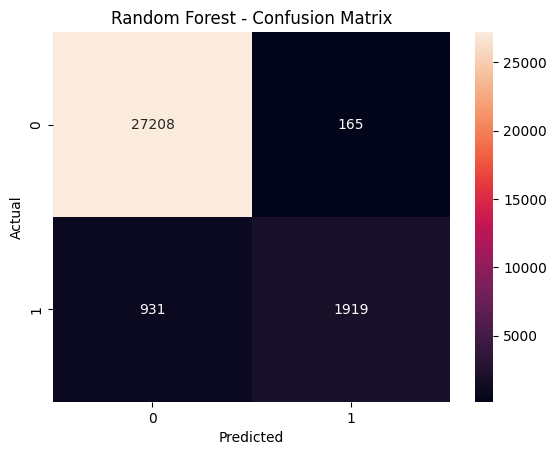

In [194]:
# confusion matrix: random forest
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d')
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# -------------------------------
# 🔶 Customer Segmentation (KMeans)
# -------------------------------
# Select features for clustering

In [196]:
df

,purchase_value,class,signup_hour,purchase_hour,purchase_dayofweek,account_age_days,customer_age,sex_M,source_Direct,source_SEO,browser_FireFox,browser_IE,browser_Opera,browser_Safari,category_cosmetics,category_electronics,category_health_care,category_home_essentials
0,65278,0,22,2,5,52,39.0,1,0,1,0,0,0,0,0,0,0,1
1,96399,0,20,1,0,0,53.0,0,0,0,0,0,0,0,0,0,0,0
2,57296,1,18,18,3,0,52.0,1,0,1,0,0,1,0,0,1,0,0
3,43650,0,21,13,0,5,40.0,1,0,1,0,0,0,1,0,0,1,0
4,45016,0,7,18,2,50,45.0,1,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,58549,1,3,0,6,60,27.0,1,0,1,0,0,0,0,0,0,0,0
151108,57952,0,17,12,1,10,31.0,1,0,1,0,0,0,1,0,1,0,0
151109,19003,0,23,7,2,77,25.0,0,0,1,0,1,0,0,0,0,1,0
151110,68296,0,20,9,0,59,37.0,1,0,1,0,0,0,0,0,1,0,0


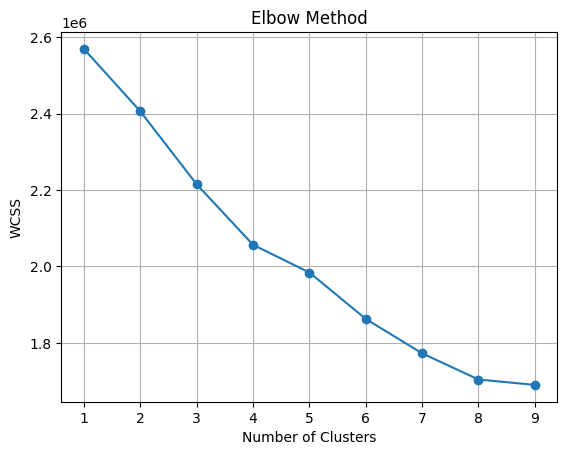

In [197]:
cluster_df = df.copy()
cluster_df.drop('class', axis=1, inplace=True)
cluster_scaled = scaler.fit_transform(cluster_df)

# Use elbow method to find optimal clusters
wcss = []
for i in range(1, 10):
    km = KMeans(n_clusters=i, random_state=42, n_init=10)
    km.fit(cluster_scaled)
    wcss.append(km.inertia_)

plt.plot(range(1, 10), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

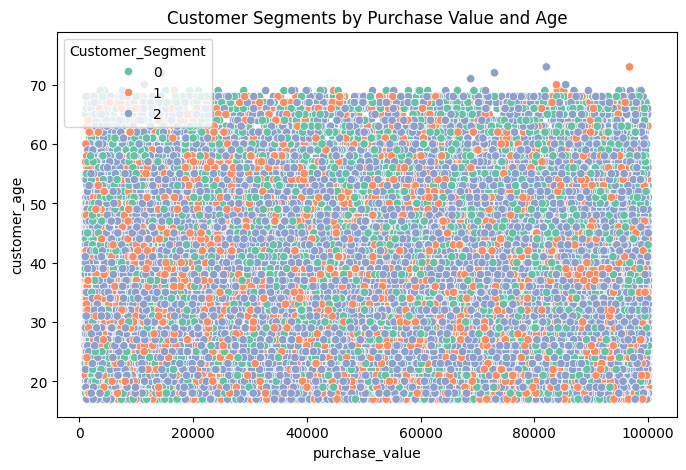

In [199]:
# Segment customers
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
segments = kmeans.fit_predict(cluster_scaled)
df['Customer_Segment'] = segments

# Plot segments by purchase value and age
plt.figure(figsize=(8, 5))
sns.scatterplot(x='purchase_value', y='customer_age', hue='Customer_Segment', data=df, palette='Set2')
plt.title("Customer Segments by Purchase Value and Age")
plt.show()
